In [2]:
import os

original_train_path = "/kaggle/input/mpox-skin-lesion-dataset-version-20-msld-v20/Original Images/Original Images/FOLDS"
augmented_train_path = "/kaggle/input/mpox-skin-lesion-dataset-version-20-msld-v20/Augmented Images/Augmented Images/FOLDS_AUG"

# Folds
folds = sorted(os.listdir(original_train_path))
print("📁 Available Folds:", folds)

# Disease classes from any fold
sample_classes = sorted(os.listdir(os.path.join(original_train_path, folds[0], 'Train')))
print("🧬 Disease Classes:", sample_classes)


📁 Available Folds: ['fold1', 'fold2', 'fold3', 'fold4', 'fold5']
🧬 Disease Classes: ['Chickenpox', 'Cowpox', 'HFMD', 'Healthy', 'Measles', 'Monkeypox']


In [9]:
from collections import defaultdict
import os

# === Path setup ===
original_path = "/kaggle/input/mpox-skin-lesion-dataset-version-20-msld-v20/Original Images/Original Images/FOLDS"
augmented_path = "/kaggle/input/mpox-skin-lesion-dataset-version-20-msld-v20/Augmented Images/Augmented Images/FOLDS_AUG"
folds = sorted(os.listdir(original_path))
splits = ["Train", "Valid", "Test"]
sample_classes = sorted(os.listdir(os.path.join(original_path, folds[0], 'Train')))

# === Total counters per fold ===
for fold in folds:
    print(f"\n📊 📂 {fold} Summary:")
    
    total_original = {}
    
    # Original Train, Val, Test
    for split in splits:
        split_total = 0
        for cls in sample_classes:
            cls_path = os.path.join(original_path, fold, split, cls)
            if os.path.exists(cls_path):
                split_total += len(os.listdir(cls_path))
        total_original[split] = split_total
        print(f"  {split} (Original): {split_total}")
    
    # Augmented Train only
    aug_fold = fold  # Same fold name assumed in FOLDS_AUG
    aug_total = 0
    for cls in sample_classes:
        cls_path = os.path.join(augmented_path, aug_fold, 'Train', cls)
        if os.path.exists(cls_path):
            aug_total += len(os.listdir(cls_path))
    
    print(f"  Train (Augmented): {aug_total}")
    print(f"  🔗 Combined Train (Orig + Aug): {total_original['Train'] + aug_total}")



📊 📂 fold1 Summary:
  Train (Original): 537
  Valid (Original): 144
  Test (Original): 74
  Train (Augmented): 0
  🔗 Combined Train (Orig + Aug): 537

📊 📂 fold2 Summary:
  Train (Original): 509
  Valid (Original): 164
  Test (Original): 82
  Train (Augmented): 0
  🔗 Combined Train (Orig + Aug): 509

📊 📂 fold3 Summary:
  Train (Original): 538
  Valid (Original): 153
  Test (Original): 64
  Train (Augmented): 0
  🔗 Combined Train (Orig + Aug): 538

📊 📂 fold4 Summary:
  Train (Original): 524
  Valid (Original): 150
  Test (Original): 81
  Train (Augmented): 0
  🔗 Combined Train (Orig + Aug): 524

📊 📂 fold5 Summary:
  Train (Original): 538
  Valid (Original): 154
  Test (Original): 63
  Train (Augmented): 0
  🔗 Combined Train (Orig + Aug): 538


In [6]:
from collections import defaultdict
import os

base_path = "/kaggle/input/mpox-skin-lesion-dataset-version-20-msld-v20/Original Images/Original Images/FOLDS"
folds = sorted(os.listdir(base_path))
splits = ["Train", "Valid", "Test"]
sample_classes = sorted(os.listdir(os.path.join(base_path, folds[0], 'Train')))

# Structure: {fold: {split: {class: count}}}
all_counts = {}

for fold in folds:
    split_counts = {}
    for split in splits:
        cls_counts = defaultdict(int)
        for cls in sample_classes:
            cls_path = os.path.join(base_path, fold, split, cls)
            if os.path.exists(cls_path):
                cls_counts[cls] = len(os.listdir(cls_path))
        split_counts[split] = cls_counts
    all_counts[fold] = split_counts

# 🔍 Print nicely
for fold, split_data in all_counts.items():
    print(f"\n📂 {fold} - Class-wise Image Counts:")
    for split in splits:
        print(f"  📁 {split}:")
        for cls in sample_classes:
            count = split_data[split].get(cls, 0)
            print(f"    {cls}: {count}")



📂 fold1 - Class-wise Image Counts:
  📁 Train:
    Chickenpox: 50
    Cowpox: 49
    HFMD: 116
    Healthy: 83
    Measles: 37
    Monkeypox: 202
  📁 Valid:
    Chickenpox: 16
    Cowpox: 10
    HFMD: 29
    Healthy: 22
    Measles: 12
    Monkeypox: 55
  📁 Test:
    Chickenpox: 9
    Cowpox: 7
    HFMD: 16
    Healthy: 9
    Measles: 6
    Monkeypox: 27

📂 fold2 - Class-wise Image Counts:
  📁 Train:
    Chickenpox: 51
    Cowpox: 47
    HFMD: 109
    Healthy: 80
    Measles: 40
    Monkeypox: 182
  📁 Valid:
    Chickenpox: 13
    Cowpox: 15
    HFMD: 32
    Healthy: 23
    Measles: 10
    Monkeypox: 71
  📁 Test:
    Chickenpox: 11
    Cowpox: 4
    HFMD: 20
    Healthy: 11
    Measles: 5
    Monkeypox: 31

📂 fold3 - Class-wise Image Counts:
  📁 Train:
    Chickenpox: 51
    Cowpox: 47
    HFMD: 114
    Healthy: 75
    Measles: 36
    Monkeypox: 215
  📁 Valid:
    Chickenpox: 18
    Cowpox: 15
    HFMD: 31
    Healthy: 28
    Measles: 14
    Monkeypox: 47
  📁 Test:
    Chickenpox: 6
  

In [7]:
from collections import defaultdict
import os

augmented_train_path = "/kaggle/input/mpox-skin-lesion-dataset-version-20-msld-v20/Augmented Images/Augmented Images/FOLDS_AUG"
folds = sorted(os.listdir(augmented_train_path))
sample_classes = sorted(os.listdir(os.path.join(augmented_train_path, folds[0], 'Train')))

# Fold-wise class counts
aug_all_counts = {}

for fold in folds:
    fold_counts = defaultdict(int)
    for cls in sample_classes:
        cls_path = os.path.join(augmented_train_path, fold, 'Train', cls)
        if os.path.exists(cls_path):
            fold_counts[cls] = len(os.listdir(cls_path))
    aug_all_counts[fold] = fold_counts

# Print results
for fold, counts in aug_all_counts.items():
    print(f"\n🧪 {fold} - Augmented Train Image Counts:")
    for cls, count in counts.items():
        print(f"  {cls}: {count}")



🧪 fold1_AUG - Augmented Train Image Counts:
  Chickenpox: 700
  Cowpox: 686
  HFMD: 1624
  Healthy: 1162
  Measles: 518
  Monkeypox: 2828

🧪 fold2_AUG - Augmented Train Image Counts:
  Chickenpox: 714
  Cowpox: 658
  HFMD: 1526
  Healthy: 1120
  Measles: 560
  Monkeypox: 2548

🧪 fold3_AUG - Augmented Train Image Counts:
  Chickenpox: 714
  Cowpox: 658
  HFMD: 1596
  Healthy: 1050
  Measles: 504
  Monkeypox: 3010

🧪 fold4_AUG - Augmented Train Image Counts:
  Chickenpox: 728
  Cowpox: 616
  HFMD: 1610
  Healthy: 1162
  Measles: 504
  Monkeypox: 2716

🧪 fold5_AUG - Augmented Train Image Counts:
  Chickenpox: 742
  Cowpox: 602
  HFMD: 1526
  Healthy: 1162
  Measles: 532
  Monkeypox: 2968


In [10]:
pip install transformers torchvision datasets tqdm


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.9 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 28.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.1 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 86.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 8.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.8.93
    Uninstalling nvidia-nvjitlink-cu12-12.8.93:
      Successfully uninstalled nvidia-nvjitlink-cu12-12.8.93
  Attempting uninstall: nvidia-curand-cu12
    Found existing 

In [12]:
!pip install transformers torchvision datasets tqdm --quiet

import os
from PIL import Image
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from transformers import ViTForImageClassification, ViTFeatureExtractor
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm


2025-04-29 20:50:15.049771: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745959815.337543      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745959815.416588      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [16]:
class MpoxDataset(Dataset):
    def __init__(self, image_dirs, transform=None):
        self.image_paths = []
        self.labels = []
        self.class_to_idx = {}
        self.transform = transform
        
        for image_dir in image_dirs:
            for class_name in sorted(os.listdir(image_dir)):
                class_path = os.path.join(image_dir, class_name)
                if not os.path.isdir(class_path): continue
                if class_name not in self.class_to_idx:
                    self.class_to_idx[class_name] = len(self.class_to_idx)
                for img_name in os.listdir(class_path):
                    self.image_paths.append(os.path.join(class_path, img_name))
                    self.labels.append(self.class_to_idx[class_name])
    
    def __len__(self):
        return len(self.image_paths)
    
    def __getitem__(self, idx):
        img = Image.open(self.image_paths[idx]).convert("RGB")
        label = self.labels[idx]
        if self.transform:
            img = self.transform(img)
        return img, label

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5]*3, std=[0.5]*3)
])

original_base = "/kaggle/input/mpox-skin-lesion-dataset-version-20-msld-v20/Original Images/Original Images/FOLDS"
augmented_base = "/kaggle/input/mpox-skin-lesion-dataset-version-20-msld-v20/Augmented Images/Augmented Images/FOLDS_AUG"
folds = [f"fold{i}" for i in range(1, 6)]

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model_name = "google/vit-base-patch16-224-in21k"
feature_extractor = ViTFeatureExtractor.from_pretrained(model_name)


preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


In [19]:
fold_accuracies = []

for fold in folds:
    print(f"\n🔁 Training on {fold}...")

    train_dirs = [
    os.path.join(original_base, fold, "Train"),
    os.path.join(augmented_base, fold + "_AUG", "Train")
    ]

    val_dir = os.path.join(original_base, fold, "Valid")
    test_dir = os.path.join(original_base, fold, "Test")

    train_dataset = MpoxDataset(train_dirs, transform)
    val_dataset = MpoxDataset([val_dir], transform)
    test_dataset = MpoxDataset([test_dir], transform)

    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
    test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

    model = ViTForImageClassification.from_pretrained(model_name, num_labels=len(train_dataset.class_to_idx))
    model.to(device)

    optimizer = optim.AdamW(model.parameters(), lr=2e-5)
    criterion = nn.CrossEntropyLoss()

    model.train()
    for epoch in range(1, 11):  # For 5 epochs; change to 20 if needed
        running_loss = 0.0
        for images, labels in tqdm(train_loader, desc=f"Epoch {epoch}", leave=False):
            images, labels = images.to(device), labels.to(device)
            outputs = model(images).logits
            loss = criterion(outputs, labels)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        print(f"  ✅ Epoch {epoch} Loss: {running_loss / len(train_loader):.4f}")

    model.eval()
    correct = total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images).logits
            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)

    acc = 100 * correct / total
    fold_accuracies.append(acc)
    print(f"📈 Fold {fold} Accuracy: {acc:.2f}%")



🔁 Training on fold1...


Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


  ✅ Epoch 1 Loss: 0.7341


  ✅ Epoch 2 Loss: 0.1552


  ✅ Epoch 3 Loss: 0.0750


  ✅ Epoch 4 Loss: 0.0527


  ✅ Epoch 5 Loss: 0.0436


  ✅ Epoch 6 Loss: 0.0307


  ✅ Epoch 7 Loss: 0.0198


  ✅ Epoch 8 Loss: 0.0152


  ✅ Epoch 9 Loss: 0.0114


  ✅ Epoch 10 Loss: 0.0092
📈 Fold fold1 Accuracy: 85.14%

🔁 Training on fold2...


Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


  ✅ Epoch 1 Loss: 0.7719


  ✅ Epoch 2 Loss: 0.1614


  ✅ Epoch 3 Loss: 0.0817


  ✅ Epoch 4 Loss: 0.0546


  ✅ Epoch 5 Loss: 0.0391


  ✅ Epoch 6 Loss: 0.0254


  ✅ Epoch 7 Loss: 0.0191


  ✅ Epoch 8 Loss: 0.0151


  ✅ Epoch 9 Loss: 0.0121


  ✅ Epoch 10 Loss: 0.0099
📈 Fold fold2 Accuracy: 85.37%

🔁 Training on fold3...


Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


  ✅ Epoch 1 Loss: 0.7098


  ✅ Epoch 2 Loss: 0.1537


  ✅ Epoch 3 Loss: 0.0786


  ✅ Epoch 4 Loss: 0.0548


  ✅ Epoch 5 Loss: 0.0383


  ✅ Epoch 6 Loss: 0.0348


  ✅ Epoch 7 Loss: 0.0225


  ✅ Epoch 8 Loss: 0.0272


  ✅ Epoch 9 Loss: 0.0129


  ✅ Epoch 10 Loss: 0.0100
📈 Fold fold3 Accuracy: 87.50%

🔁 Training on fold4...


Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


  ✅ Epoch 1 Loss: 0.7290


  ✅ Epoch 2 Loss: 0.1599


  ✅ Epoch 3 Loss: 0.0821


  ✅ Epoch 4 Loss: 0.0568


  ✅ Epoch 5 Loss: 0.0404


  ✅ Epoch 6 Loss: 0.0294


  ✅ Epoch 7 Loss: 0.0258


  ✅ Epoch 8 Loss: 0.0371


  ✅ Epoch 9 Loss: 0.0203


  ✅ Epoch 10 Loss: 0.0115
📈 Fold fold4 Accuracy: 85.19%

🔁 Training on fold5...


Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


  ✅ Epoch 1 Loss: 0.7390


  ✅ Epoch 2 Loss: 0.1553


  ✅ Epoch 3 Loss: 0.0850


  ✅ Epoch 4 Loss: 0.0529


  ✅ Epoch 5 Loss: 0.0430


  ✅ Epoch 6 Loss: 0.0290


  ✅ Epoch 7 Loss: 0.0311


  ✅ Epoch 8 Loss: 0.0156


  ✅ Epoch 9 Loss: 0.0115


  ✅ Epoch 10 Loss: 0.0092
📈 Fold fold5 Accuracy: 95.24%


In [21]:
import numpy as np

# Add your actual accuracy values here
accuracies = [85.14, 85.37, 87.50, 85.19, 95.24]

print("\n📈 Fold-wise Accuracies:")
for i, acc in enumerate(accuracies, 1):
    print(f"Fold {i}: {acc:.2f}%")

mean_acc = np.mean(accuracies)
std_acc = np.std(accuracies)

print(f"\n📊 Average Accuracy: {mean_acc:.2f}%")
print(f"📉 Std Deviation:   {std_acc:.2f}%")



📈 Fold-wise Accuracies:
Fold 1: 85.14%
Fold 2: 85.37%
Fold 3: 87.50%
Fold 4: 85.19%
Fold 5: 95.24%

📊 Average Accuracy: 87.69%
📉 Std Deviation:   3.88%


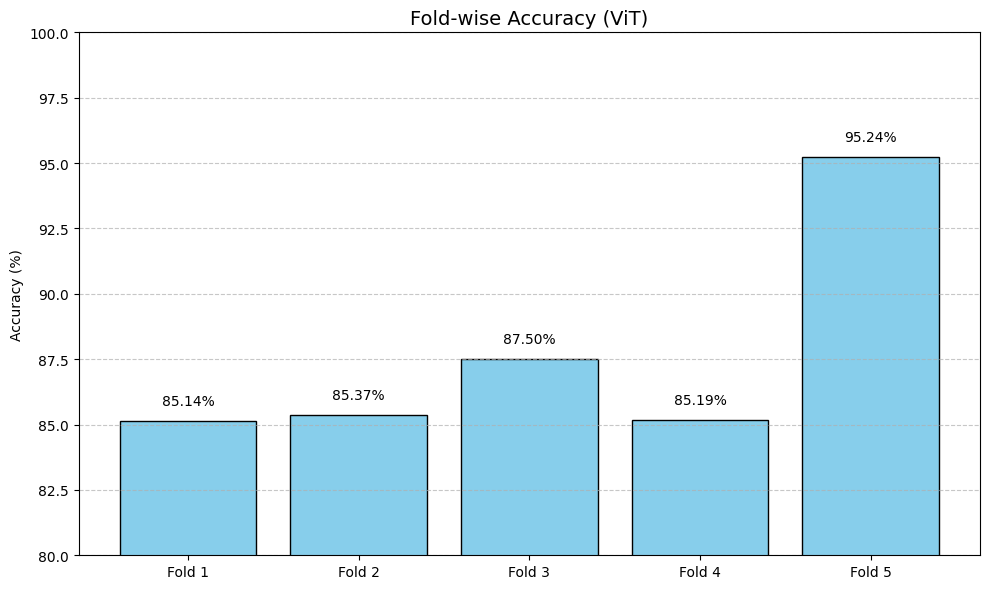

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Accuracy values from your training logs
folds = ['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5']
accuracies = [85.14, 85.37, 87.50, 85.19, 95.24]  # replace with actual values if different

# Bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(folds, accuracies, color='skyblue', edgecolor='black')

# Add value labels on top
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f'{yval:.2f}%', ha='center', va='bottom', fontsize=10)

# Chart formatting
plt.title('Fold-wise Accuracy (ViT)', fontsize=14)
plt.ylabel('Accuracy (%)')
plt.ylim(80, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


📈 Fold Fold 1 Accuracy: 95.24%

📋 Classification Report:
              precision    recall  f1-score   support

  Chickenpox       1.00      0.71      0.83         7
      Cowpox       1.00      1.00      1.00         7
        HFMD       1.00      1.00      1.00        15
     Healthy       1.00      1.00      1.00        10
     Measles       1.00      0.83      0.91         6
   Monkeypox       0.86      1.00      0.92        18

    accuracy                           0.95        63
   macro avg       0.98      0.92      0.94        63
weighted avg       0.96      0.95      0.95        63



/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129504 (\N{BRAIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


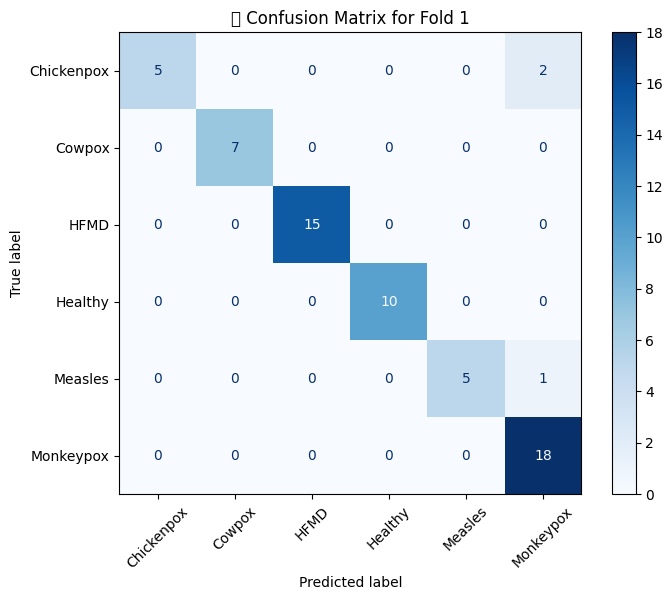

In [31]:
    model.eval()
    correct = total = 0
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images).logits
            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    acc = 100 * correct / total
    fold_accuracies.append(acc)
    print(f"📈 Fold {fold} Accuracy: {acc:.2f}%")

    # 📋 Classification Report
    print("\n📋 Classification Report:")
    print(classification_report(all_labels, all_preds, target_names=train_dataset.class_to_idx.keys()))

    # 📊 Confusion Matrix
    cm = confusion_matrix(all_labels, all_preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=train_dataset.class_to_idx.keys())
    fig, ax = plt.subplots(figsize=(8, 6))
    disp.plot(ax=ax, cmap='Blues', xticks_rotation=45)
    plt.title(f"🧠 Confusion Matrix for {fold}")
    plt.show()